<a href="https://colab.research.google.com/github/kwanqing/CMPE-257-Fall23-Jeffrey-Ong/blob/take-home-exam/take_home_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Take Home Exam

## Task 1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
# From the dataset, we can see that it consists 3 columns
# y is the target variable with x1 and x2 as the features
train_data_path = 'synthetic_dataset.csv'
test_data_path = 'synthetic_test_dataset.csv'

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

train_data.head()

,x1,x2,y
0,3.989474,6.935317,1
1,-6.248354,-8.750153,-1
2,-1.419806,-3.427461,-1
3,-9.266949,7.083503,1
4,-8.487555,-4.916374,-1


In [ ]:
test_data.head()

,x1,x2,y
0,-1.800591,2.131077,-1.0
1,-5.116260,6.153548,-1.0
2,1.040485,0.889453,-1.0
3,1.796096,-1.008297,-1.0
4,-4.039528,7.832167,-1.0


In [ ]:
# Step 1: Train a linear model and collect the training and validation errors
# Use linear regression algorithm and MSE to get the training and validation errors.

x_train = train_data[['x1', 'x2']]
y_train = train_data['y']
x_test = test_data[['x1', 'x2']]
y_test = test_data['y']

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

y_train_pred = linear_model.predict(x_train)
y_test_pred = linear_model.predict(x_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Training error: ", mse_train)
print("Validation error: ", mse_test)

Training error:  0.8669392995099426
Validation error:  0.844018025552504


In [ ]:
# Step 2: Train a linear model using quadratic, 3rd order, and 4th order polynomial transforms and collect the training and validation errors.

# Degrees of the polynomial transformations
degrees = [2, 3, 4]

mse_results = {
    'degree': [],
    'mse_train': [],
    'mse_test': []
}

# Training models for each polynomial degree
for degree in degrees:
    # Create a pipeline that first transforms the data using PolynomialFeatures, then applies LinearRegression
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    mse_results['degree'].append(degree)
    mse_results['mse_train'].append(mse_train)
    mse_results['mse_test'].append(mse_test)

mse_results_df = pd.DataFrame(mse_results)
mse_results_df

,degree,mse_train,mse_test
0,2,0.671256,0.752794
1,3,0.253624,0.686755
2,4,0.173705,0.569765


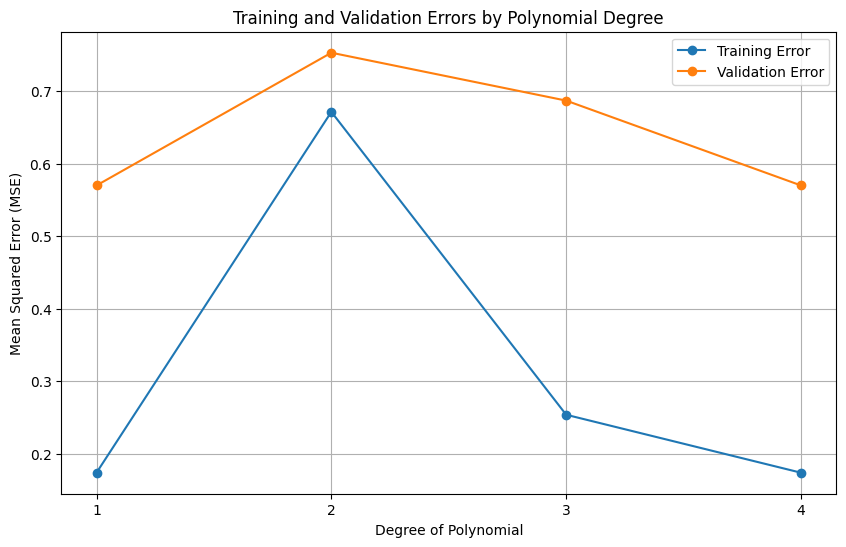

In [ ]:
# Step 3: Plot the training and validation errors by order of polynomial transforms, i.e., linear, quadratic, 3rd, and 4th order.
mse_results_df.loc[-1] = [1, mse_train, mse_test]
mse_results_df.index = mse_results_df.index + 1
mse_results_df = mse_results_df.sort_index()

plt.figure(figsize=(10, 6))
plt.plot(mse_results_df['degree'], mse_results_df['mse_train'], label='Training Error', marker='o')
plt.plot(mse_results_df['degree'], mse_results_df['mse_test'], label='Validation Error', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation Errors by Polynomial Degree')
plt.xticks(mse_results_df['degree'])
plt.legend()
plt.grid(True)
plt.show()

#### Step 4: Comment on the pattern you observe. Also, comment on which of the models you would pick and why you would pick it.

As the degree of the polynomial increases, both the training and validation MSE decrease, indicating a better fit to the data. However, it's important to be cautious of overfitting, especially with higher degree polynomials, as they tend to fit the training data too closely, potentially at the expense of generalization to new data.


But in order to select the appropriate model, we must depends on balancing the trade-off between underfitting and overfitting. The linear model (1st degree) is likely too simple as indicated by its higher errors. The 4th degree polynomial model, while having the lowest error might be too complex and could overfit the data. Therefore, I would pick 3rd degree polynomial model because it strikes a balance between complexity and the risk of overfitting as evidenced by its significantly lower error than the linear model and only slightly higher error than the 4th degree polynomial.